In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
import pickle

from hominid_pipeline import hominid, gia_utils

2023-06-13 09:47:09.013104: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-13 09:47:09.883043: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-06-13 09:47:09.883113: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-06-13 09:47:09.883120: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [2]:
working_dir = "/home/chandana/projects/hominid_pipeline/results"
hits = [
    "experiments/sweeps/tune_hominid_8f34a_00085_85_conv1_activation=exponential,conv1_attention_pool_size=23,conv1_batchnorm=True,conv1_channel_weight=se_2023-05-18_00-04-12",
    "experiments/sweeps/tune_hominid_8f34a_00185_185_conv1_activation=relu,conv1_attention_pool_size=23,conv1_batchnorm=True,conv1_channel_weight=softconv_2023-05-18_06-11-38",
    "experiments/model_variations/tune_hominid_8f34a_00058_58_conv1_activation=relu,conv1_attention_pool_size=30,conv1_batchnorm=False,conv1_channel_weight=softconv_2023-05-17_22-09-59/exponential", # this one!
    "experiments/model_variations/tune_hominid_8f34a_00056_56_conv1_activation=relu,conv1_attention_pool_size=5,conv1_batchnorm=False,conv1_channel_weight=se,conv1__2023-05-17_22-05-53/exponential",
    "experiments/model_variations/tune_hominid_8f34a_00058_58_conv1_activation=relu,conv1_attention_pool_size=30,conv1_batchnorm=False,conv1_channel_weight=softconv_2023-05-17_22-09-59/exponential/variations/variation_1"    
]

index = 3
save_path = f"{working_dir}/{hits[index]}"
config_file = f"{working_dir}/{hits[index]}/config.yaml"
config = hominid.load_config(config_file)

tuner = hominid.HominidTuner(
    config, 
    epochs=100, 
    tuning_mode=False, 
    save_path=save_path, 
    subsample=False
)

tuner.save_path

'/home/chandana/projects/hominid_pipeline/results/experiments/model_variations/tune_hominid_8f34a_00056_56_conv1_activation=relu,conv1_attention_pool_size=5,conv1_batchnorm=False,conv1_channel_weight=se,conv1__2023-05-17_22-05-53/exponential'

In [3]:
gia_path = f'{tuner.save_path}/gia'
gia_path

'/home/chandana/projects/hominid_pipeline/results/experiments/model_variations/tune_hominid_8f34a_00056_56_conv1_activation=relu,conv1_attention_pool_size=5,conv1_batchnorm=False,conv1_channel_weight=se,conv1__2023-05-17_22-05-53/exponential/gia'

In [18]:
with open(f'{gia_path}/gia_results.pickle', 'rb') as fout:

    motifs0 = pickle.load(fout)
    flanks0 = pickle.load(fout)
    flank_scores0 = pickle.load(fout)
    pos_scores0 = pickle.load(fout)
    pos_index0 = pickle.load(fout)
    interact_scores0 = pickle.load(fout)
    interact_pos_scores0 = pickle.load(fout)
    motifs1 = pickle.load(fout)
    flanks1 = pickle.load(fout)
    flank_scores1 = pickle.load(fout)
    pos_scores1 = pickle.load(fout)
    pos_index1 = pickle.load(fout)
    interact_scores1 = pickle.load(fout)
    interact_pos_scores1 = pickle.load(fout)

In [19]:
gia_pairs = [
    'gata-ap1',
    'ohler1-dre',
    'ohler6-dre',
    'ohler7-dre',
    'ohler7-dref',
    'ohler6-ohler1'
]

In [20]:
results = []
for gia_pair in gia_pairs:
    
    scores = interact_scores0[gia_pair]
    results += [scores[0] - np.mean(scores[1]) - np.mean(scores[2])]

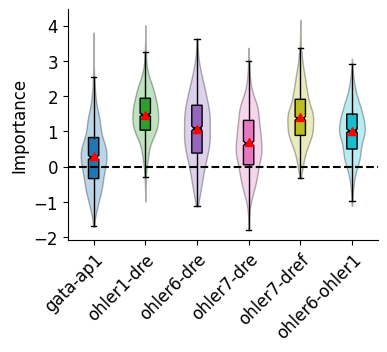

In [21]:
fontsize = 12
fig = plt.figure(figsize=(4,3))
gia_utils.box_violin_plot(results, cmap='tab10', ylabel='Importance', xlabel=None, title=None, fontsize=fontsize)
plt.axhline(0, 0, 3, linestyle='--', color='black')
#plt.ylim([-.5, 1.5])

ax = plt.gca();
plt.setp(ax.get_yticklabels(), fontsize=fontsize)
plt.setp(ax.get_xticklabels(), fontsize=fontsize)
# plt.yticks([-1, 0.0, 1, 2], fontsize=fontsize)
#plt.xticks([50, 100, 150, 200], fontsize=fontsize)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(range(1, len(gia_pairs)+1), gia_pairs, fontsize=fontsize, rotation=45, ha='right', rotation_mode='anchor')
# plt.ylim([-1,2])

fig.savefig(f'{gia_path}/pos_interactions_comparison.pdf', format='pdf', dpi=200, bbox_inches='tight')

In [57]:
interact_scores0.keys()

dict_keys(['dre-ohler1', 'ohler1_rc-ohler6_rc', 'ohler7-dre', 'dre-ohler7', 'ohler7-dref', 'dref-ohler7', 'gata-ap1', 'gata_rc-ap1', 'ap1-gata', 'ap1-gata_rc', 'ohler1-dre', 'ohler1-ohler6', 'ohler1-ohler6_rc', 'ohler1_rc-ohler6', 'ohler6-ohler1', 'ohler6-ohler1_rc', 'ohler6_rc-ohler1', 'ohler6_rc-ohler1_rc', 'ohler6-dre', 'ohler6_rc-dre', 'stat-ts01', 'ts01-stat', 'cebp-ohler1', 'ohler1-cebp', 'ohler5-mitf', 'mitf-ohler5', 'mitf-ohler1', 'mitf-ohler6', 'mitf-ohler7', 'mitf-gata', 'mitf-stat', 'mitf-cebp', 'gata-context', 'ohler1-context', 'ohler6-context', 'ohler7-context', 'dre-context', 'ts01-myb', 'mitf-myb', 'ohler7-myb', 'dre-ap1', 'ap1-dre', 'ohler1-ap1', 'ohler1_rc-ap1', 'ap1-ohler1', 'ap1-ohler1_rc', 'dre-gata', 'dre-gata_rc', 'gata-dre', 'gata_rc-dre', 'ohler6-at', 'ohler6_rc-at'])

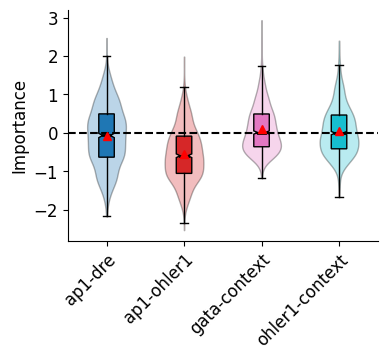

In [22]:
neg_interactions = [
    'ap1-dre',
    'ap1-ohler1',
    'gata-context',
    'ohler1-context',
]

results = []
for neg_interaction in neg_interactions:
    
    scores = interact_scores0[neg_interaction]
    results += [scores[0] - np.mean(scores[1]) - np.mean(scores[2])]
    
    
    
fontsize = 12
fig = plt.figure(figsize=(4,3))
gia_utils.box_violin_plot(results, cmap='tab10', ylabel='Importance', xlabel=None, title=None, fontsize=fontsize)
plt.axhline(0, 0, 3, linestyle='--', color='black')
#plt.ylim([-.5, 1.5])

ax = plt.gca();
plt.setp(ax.get_yticklabels(), fontsize=fontsize)
plt.setp(ax.get_xticklabels(), fontsize=fontsize)
# plt.yticks([-1, 0.0, 1, 2], fontsize=fontsize)
#plt.xticks([50, 100, 150, 200], fontsize=fontsize)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(range(1, len(neg_interactions)+1), neg_interactions, fontsize=fontsize, rotation=45, ha='right', rotation_mode='anchor')
# plt.ylim([-1,2])

fig.savefig(f'{gia_path}/neg_interactions_comparison.pdf', format='pdf', dpi=200, bbox_inches='tight')

In [24]:
with open(f'{gia_path}/gata_results.pickle', 'rb') as fout:
    scores = pickle.load(fout)
    scores2 = pickle.load(fout)
    scores3 = pickle.load(fout)
    scores4 = pickle.load(fout)

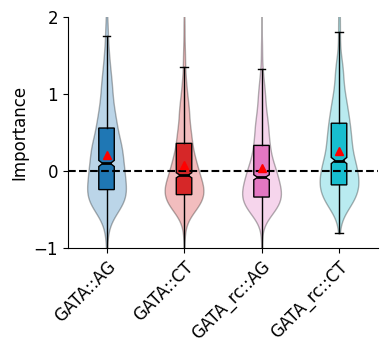

In [25]:



results = [
    scores3[0] - np.mean(scores3[1]) - np.mean(scores3[2]),
    scores4[0] - np.mean(scores4[1]) - np.mean(scores4[2]),
    scores[0] - np.mean(scores[1]) - np.mean(scores[2]), 
    scores2[0] - np.mean(scores2[1]) - np.mean(scores2[2]),
]

fontsize = 12
fig = plt.figure(figsize=(4,3))
gia_utils.box_violin_plot(results, cmap='tab10', ylabel='Importance', xlabel=None, title=None, fontsize=fontsize)
plt.axhline(0, 0, 3, linestyle='--', color='black')
#plt.ylim([-.5, 1.5])

ax = plt.gca();
plt.setp(ax.get_yticklabels(), fontsize=fontsize)
plt.setp(ax.get_xticklabels(), fontsize=fontsize)
plt.yticks([-1, 0.0, 1, 2], fontsize=fontsize)
#plt.xticks([50, 100, 150, 200], fontsize=fontsize)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(range(1,5), ['GATA::AG', 'GATA::CT', 'GATA_rc::AG', 'GATA_rc::CT'], fontsize=fontsize, rotation=45, ha='right', rotation_mode='anchor')
plt.ylim([-1,2])
fig.savefig(f'{gia_path}/gata_context_comparison.pdf', format='pdf', dpi=200, bbox_inches='tight')

In [ ]:

results = [
    scores3[0] - np.mean(scores3[1]) - np.mean(scores3[2]),
    scores4[0] - np.mean(scores4[1]) - np.mean(scores4[2]),
    scores[0] - np.mean(scores[1]) - np.mean(scores[2]), 
    scores2[0] - np.mean(scores2[1]) - np.mean(scores2[2]),
]

fontsize = 12
fig = plt.figure(figsize=(4,3))
box_violin_plot(results, cmap='tab10', ylabel='Importance', xlabel=None, title=None, fontsize=fontsize)
plt.axhline(0, 0, 3, linestyle='--', color='black')
#plt.ylim([-.5, 1.5])

ax = plt.gca();
plt.setp(ax.get_yticklabels(), fontsize=fontsize)
plt.setp(ax.get_xticklabels(), fontsize=fontsize)
plt.yticks([-1, 0.0, 1, 2], fontsize=fontsize)
#plt.xticks([50, 100, 150, 200], fontsize=fontsize)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks(range(1,5), ['GATA::AG', 'GATA::CT', 'GATA_rc::AG', 'GATA_rc::CT'], fontsize=fontsize, rotation=45, ha='right', rotation_mode='anchor')
plt.ylim([-1,2])

fig.savefig('gata_context_comparison.pdf', format='pdf', dpi=200, bbox_inches='tight')